# Toy experiment

In [11]:
"""
Importing required libraries and defining key functions
"""
# Requirements for algorithms
import numpy as np
import scipy.special as sp

# Requirements For plots and diagnostics
import matplotlib.pyplot as plt
import scipy.stats as sps
import time
from sklearn.metrics import roc_auc_score
from datetime import date
import inspect
import pickle

# Algorithm functions
import os
os.chdir('C:/Users/hughw/Documents/MSC project/GP algorithms/Master function files')
from GP_funcs_ZTMFSS import kernel_funcs
from GP_funcs_ZTMFSS import model_funcs
from GP_funcs_ZTMFSS import draw_GP
from GP_funcs_ZTMFSS import fit
from GP_funcs_MFSS import fit as mf_fit
from GP_funcs_FRSS import fit as lr_fit
from GP_funcs_ZTMFSS import diagnostics
from GP_funcs_ZTMFSS import simulations
from functools import partial
os.chdir('C:/Users/hughw/Documents/MSC project/Simulation results')

In [27]:
"""
Simulation settings
"""
# Simulation settings
n=300
ntest=0
p=100
q=5
noise_ratio=0.05
corr=0

np.random.seed(333)
X = np.random.multivariate_normal(np.zeros(p), np.diag(np.ones(p))*(1-corr)+corr, n)
a = np.linspace(1,1/q,q)
f = np.sin(a*X[:,:q])
if q>1:
    f = np.sum(f,1)
noise_var = noise_ratio*np.var(f)
Y = (f + np.random.normal(0,noise_var**0.5,n)).reshape(n,1)

### We run a GP-ML-II on the dataset and recover lengthscales

In [28]:
"""
Running GP on data
"""
results_MLII = fit.VB_EM_GP_SS(Y, X, l0 = 0.01,lmbda0=1, GP_fit_tol = 1e-5, min_VBEM_iter = 1, max_VBEM_iter = 1, max_GP_fit_iter = 200, init_GP_iter = 200, VBEM_tol = 0.01, 
                              s0 = np.var(Y), sig0 = np.var(Y)**0.5, optimisation = "adam",sampling_strat = "unif",
                              ELBO_sample = np.min((1000,n)), learn_rate = 0.01, subsample = n, newsumgrads=False, 
                              nn_fraction = 1, iter_remove = False)

#results_MLII_1d = fit.VB_EM_GP_SS(Y, X[:,:q].reshape(n,q), l0 = 0.01,lmbda0=1, GP_fit_tol = 1e-5, min_VBEM_iter = 1, max_VBEM_iter = 1, max_GP_fit_iter = 500, init_GP_iter = 200, VBEM_tol = 0.01, 
#                              s0 = np.var(Y), sig0 = np.var(Y)**0.5, optimisation = "adam",sampling_strat = "unif",
#                            ELBO_sample = np.min((1000,n)), learn_rate = 0.01, subsample = n, newsumgrads=False, 
#                              nn_fraction = 1, iter_remove = False)

#results_MLII_9d = fit.VB_EM_GP_SS(Y, X[:,q:].reshape(n,p-q), l0 = 0.01,lmbda0=1, GP_fit_tol = 1e-5, min_VBEM_iter = 1, max_VBEM_iter = 1, max_GP_fit_iter = 500, init_GP_iter = 200, VBEM_tol = 0.01, 
#                              s0 = np.var(Y), sig0 = np.var(Y)**0.5, optimisation = "adam",sampling_strat = "unif",
#                              ELBO_sample = np.min((1000,n)), learn_rate = 0.01, subsample = n, newsumgrads=False, 
#                              nn_fraction = 1, iter_remove = False)

run 1, diff = 0.44029774622696605, elbo = [[466.86927702]]
sigma is  0.06198893293109615
run time is : 21.467586994171143


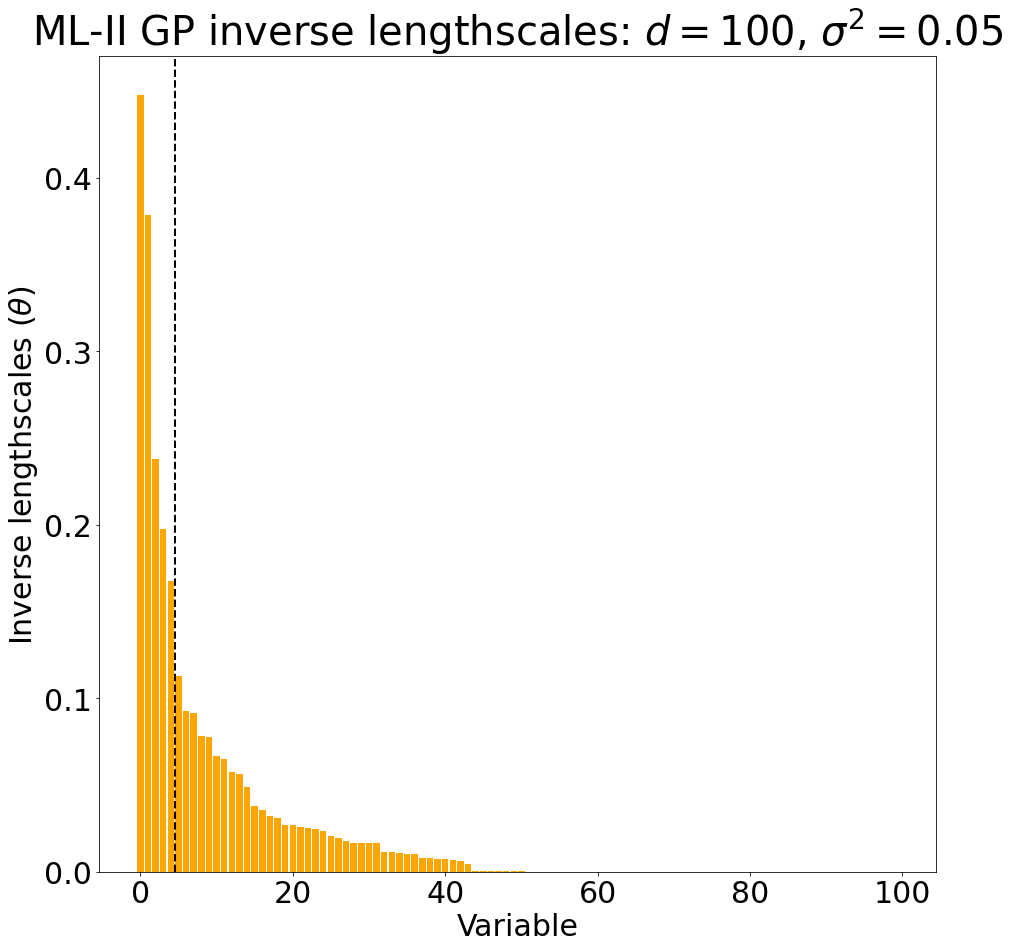

In [29]:

plt.rc('axes',edgecolor='black')
font ={'size'   : 30}
plt.rc('font', **font)

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel("Variable")
axs.set_ylabel("Inverse lengthscales " + r'$(\theta)$')
axs.set_title(r"ML-II GP inverse lengthscales: $d={1}$, $\sigma^2 = {0}$".format(noise_ratio,p), fontsize=40)
plt.bar(range(p),height = np.sort(np.abs(results_MLII[0][0]))[::-1], color = "orange", width = 0.5+(p>10)*0.35)
plt.axvline(x=q-0.5, color = "black", linestyle = "--", lw = 2)
fig.savefig("ML_II_ls_allinclude_noise={0}_d={1}_n={2}".format((noise_ratio>0.01)*1,p,n))# CHANGE FOR NOISE AND N

# Producing sequence of marginal likelihoods

run time is : 0.45777416229248047
-125.35637618815923


C:\Users\hughw\Documents\MSC project\GP algorithms\Master function files\GP_funcs_ZTMFSS.py:59: RuntimeWarning: divide by zero encountered in true_divide
  return kern(cdist(X,X, metric = "seuclidean", V = 1/l**2),s)


run time is : 0.7130930423736572
-61.58229403914177
run time is : 0.6971340179443359
45.0459981599725
run time is : 0.8776524066925049
158.23376575380496
run time is : 0.7669799327850342
158.59891423680668
run time is : 0.9025905132293701
158.80956158603018
run time is : 0.8636901378631592
158.824939321155
run time is : 1.1958000659942627
158.8262466092216
run time is : 0.9175026416778564
220.5551832467017
run time is : 1.4910132884979248
221.27671892998598
run time is : 1.2267193794250488
221.91918671141195
run time is : 2.0488178730010986
221.91835244665148
run time is : 1.371070146560669
222.1260081812188
run time is : 2.108062982559204
222.60178330542283
run time is : 1.259629487991333
223.64063792511863
run time is : 2.0704619884490967
226.26708894783744
run time is : 1.4810373783111572
228.4211556040235
run time is : 2.6615564823150635
228.79496611908593
run time is : 1.5329039096832275
228.86732655155447
run time is : 2.6031105518341064
229.51600730687403
run time is : 1.5518503

No handles with labels found to put in legend.


run time is : 11.148390531539917
244.1626398710615


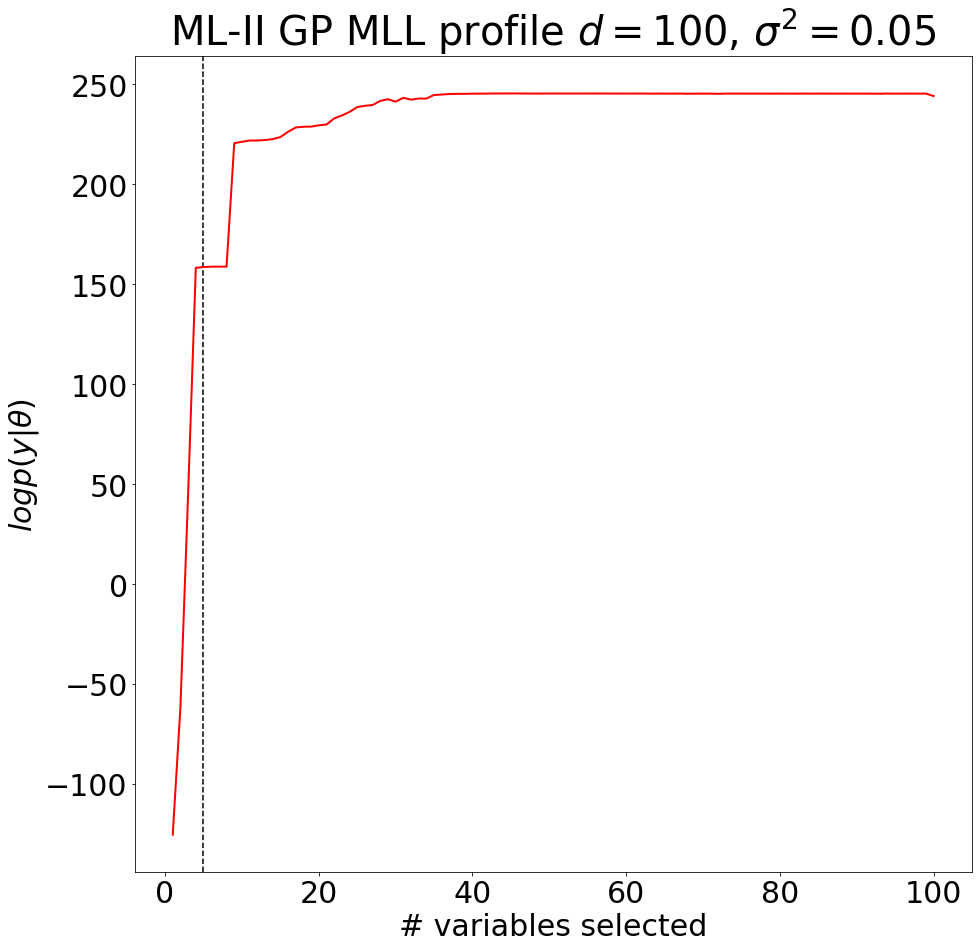

454.57839584350586


In [47]:
"""
Getting ML profiles for different ML-II solutions
"""
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

# Adding jitter for multiple runs
jitter = 1e-2
runs = 1
reg=0.01

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel(r'# variables selected')
axs.set_ylabel(r'$logp(y|\theta)$')

order =  np.argsort(np.abs(results_MLII[0][0]))[::-1]
t = time.time()
for j in range(runs):
    if j < runs-1:
        jit = np.random.normal(0,jitter,p)
    else:
        jit = np.zeros(p)   

    logl_est = np.zeros(100)
    for i in range(100):
        
        not_selected = order[(i+1):]
        selected = order[:(i+1)]
        l[not_selected] = 0
        results = fit.VB_EM_GP_SS(Y, X[:,selected], l0 = results_MLII[0][0][selected],lmbda0=1, GP_fit_tol = 1e-5, min_VBEM_iter = 1, max_VBEM_iter = 1, max_GP_fit_iter = 100, init_GP_iter = 100, VBEM_tol = 0.01, 
                              s0 = np.var(Y), sig0 = np.var(Y)**0.5, optimisation = "adam",sampling_strat = "unif",
                              ELBO_sample = np.min((1000,n)), learn_rate = 0.01, subsample = n, newsumgrads=False, 
                              nn_fraction = 1, iter_remove = False, print_VBEM=False)
        l[selected]=results[0][0]
        K = kernel_funcs.ARD_lm(l,results[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results[2]**2+reg)
        logl_est[i] = model_funcs.logL(Y,Ktild)
        print(logl_est[i])
        
    if j==(runs-1):
        plt.plot(np.linspace(1,100,100), logl_est, color ="red", lw=2, zorder=11)
        plt.axvline(x=5, linestyle = "--", color = "black")
    else:
        plt.plot(np.linspace(1,100,100), logl_est, color ="pink", zorder=11)
if noise_ratio>0.01:
    legend = plt.legend(fontsize = 30)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')
plt.title(r"ML-II GP MLL profile $d={1}$, $\sigma^2 = {0}$".format(noise_ratio, p), Fontsize=40)
plt.show()
fig.savefig("ML_overfit_noise={0}_n={1}_d={2}".format(1*(noise_ratio>=0.1), n,p))  # CHANGE FOR NOISE AND N
print(time.time()-t)

In [57]:
"""
Getting ML-II solutions for including all variables, and only including correct variables
"""
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

# Adding jitter for multiple runs
jitter = 1e-2
runs = 100
reg=0.01

order =  np.argsort(np.abs(results_MLII[0][0]))[::-1]
t = time.time()
logl_est = np.zeros((runs,2))
iterr=0
for i in [4,99]:
    not_selected = order[(i+1):]
    selected = order[:(i+1)]
    l[not_selected] = 0
    results = fit.VB_EM_GP_SS(Y, X[:,selected], l0 = results_MLII[0][0][selected],lmbda0=1, GP_fit_tol = 1e-5, min_VBEM_iter = 1, max_VBEM_iter = 1, max_GP_fit_iter = 100, init_GP_iter = 100, VBEM_tol = 0.01, 
                          s0 = np.var(Y), sig0 = np.var(Y)**0.5, optimisation = "adam",sampling_strat = "unif",
                          ELBO_sample = np.min((1000,n)), learn_rate = 0.01, subsample = n, newsumgrads=False, 
                          nn_fraction = 1, iter_remove = False, print_VBEM=False)
    for j in range(runs):
        if j < runs-1:
            jit = np.random.normal(0,jitter,p)
        else:
            jit = np.zeros(p) 
        l[selected]=results[0][0]+jit[:i+1]
        K = kernel_funcs.ARD_lm(l,results[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results[2]**2+reg)
        logl_est[j,iterr] = model_funcs.logL(Y,Ktild)
        print(logl_est[j,iterr])
    iterr+=1


run time is : 0.9014644622802734
158.2609387988764
158.365370547896
158.5332002840103
158.46435626357405
158.3842577857766
158.56642564384168
158.42539751379132
158.48469453989082
158.50883619370185
158.51945022992837
158.56782650725285
158.49957763895475
158.3858901447225
158.51452464055944
158.45027022694308
158.55197916790158
158.41513348663142
158.47864553081035
158.49677851201184
158.56442496679014
158.471025366888
158.4898035800416
158.51791898881618
158.53949286471666
158.57006165125068
158.44678817031055
158.47675203763959
158.35236298943352
158.49389660019068
158.51353880269974
158.47288449467422
158.48944164461756
158.3156899797948
158.40425567664823
158.47309390763814
158.47328709866088
158.57961588606972
158.51181963180562
158.47429130999808
158.52466858560103
158.349305306521
158.46717867872013
158.53335071743555
158.52263229819243
158.54362030547082
158.5515871566584
158.53568206413584
158.48902199372753
158.5257517970087
158.49388649537065
158.37315013573902
158.46546345

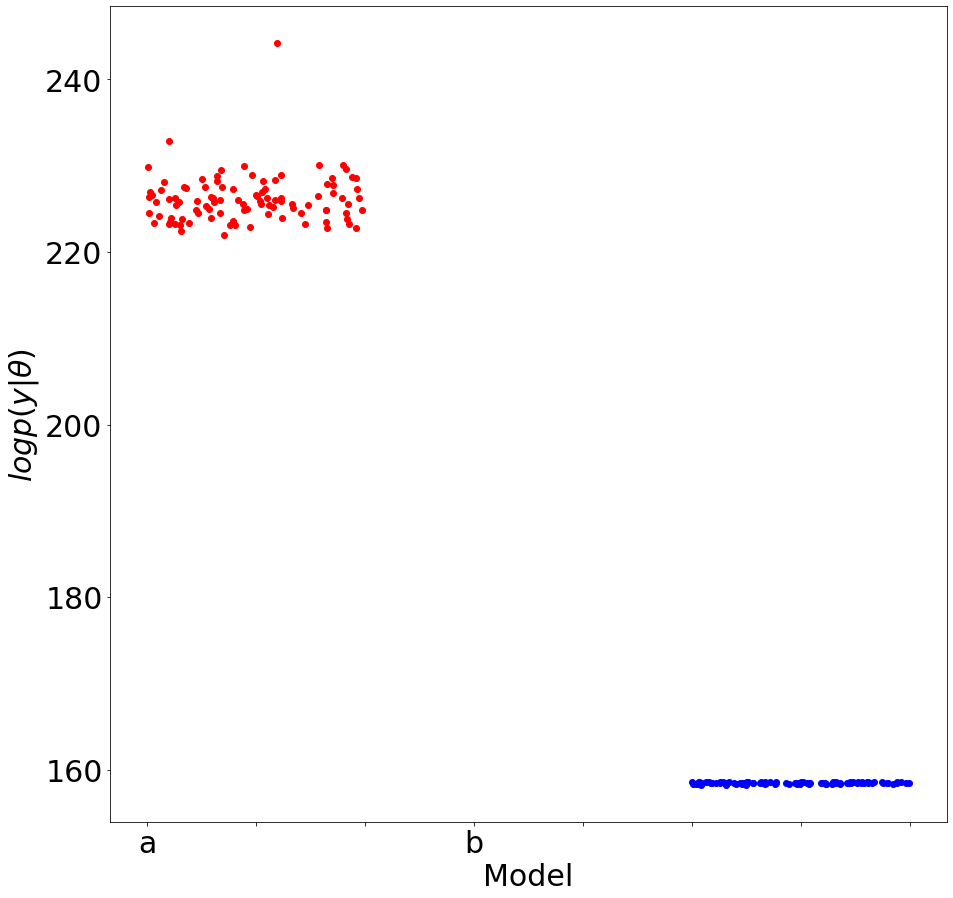

In [69]:
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel(r'Model')
axs.set_xticklabels(["","a","","","b"])
axs.set_ylabel(r'$logp(y|\theta)$')
axs.scatter(1.05+np.random.random(runs)*0.02, logl_est[:,0], color = "blue")
axs.scatter(1+np.random.random(runs)*0.02, logl_est[:,1], color = "red")

In [ ]:
"""
Getting ML profiles for different ML-II solutions
"""
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

# Adding jitter for multiple runs
jitter = 1e-2
runs = 1
reg=0.01

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel(r'# variables selected')
axs.set_ylabel(r'$logp(y|\theta)$')

order =  np.argsort(np.abs(results_MLII[0][0]))[::-1]

for j in range(runs):
    if j < runs-1:
        jit = np.random.normal(0,jitter,p)
    else:
        jit = np.zeros(p)   

    logl_est = np.zeros(100)
    for i in range(100):
        
        not_selected = order[i+1:]
        l = results_MLII[0][0]+jit
        l[not_selected] = 0
        K = kernel_funcs.ARD_lm(l,results_MLII[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII[2]**2+reg)
        logl_est[i] = model_funcs.logL(Y,Ktild)
        
    if j==(runs-1):
        plt.plot(np.linspace(1,100,100), logl_est, color ="red", lw=2, zorder=11)
        plt.axvline(x=5, linestyle = "--", color = "black")
    else:
        plt.plot(np.linspace(1,100,100), logl_est, color ="pink", zorder=11)
if noise_ratio>0.01:
    legend = plt.legend(fontsize = 30)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')
plt.title(r"$d={1}$, $\sigma^2 = {0}$".format(noise_ratio, p), Fontsize=40)
plt.show()
fig.savefig("ML_overfit_noise_refit={0}_n={1}_d={2}".format(1*(noise_ratio>=0.1), n,p))  # CHANGE FOR NOISE AND N

### Next we get the MLL profiles for (1) all vars in, (2) relevant vars in, (3) irrelevant vars in - and when varying relevant var parameters around ML-II solution

C:\Users\hughw\Documents\MSC project\GP algorithms\Master function files\GP_funcs_ZTMFSS.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return kern(cdist(X,X, metric = "seuclidean", V = 1/l**2),s)


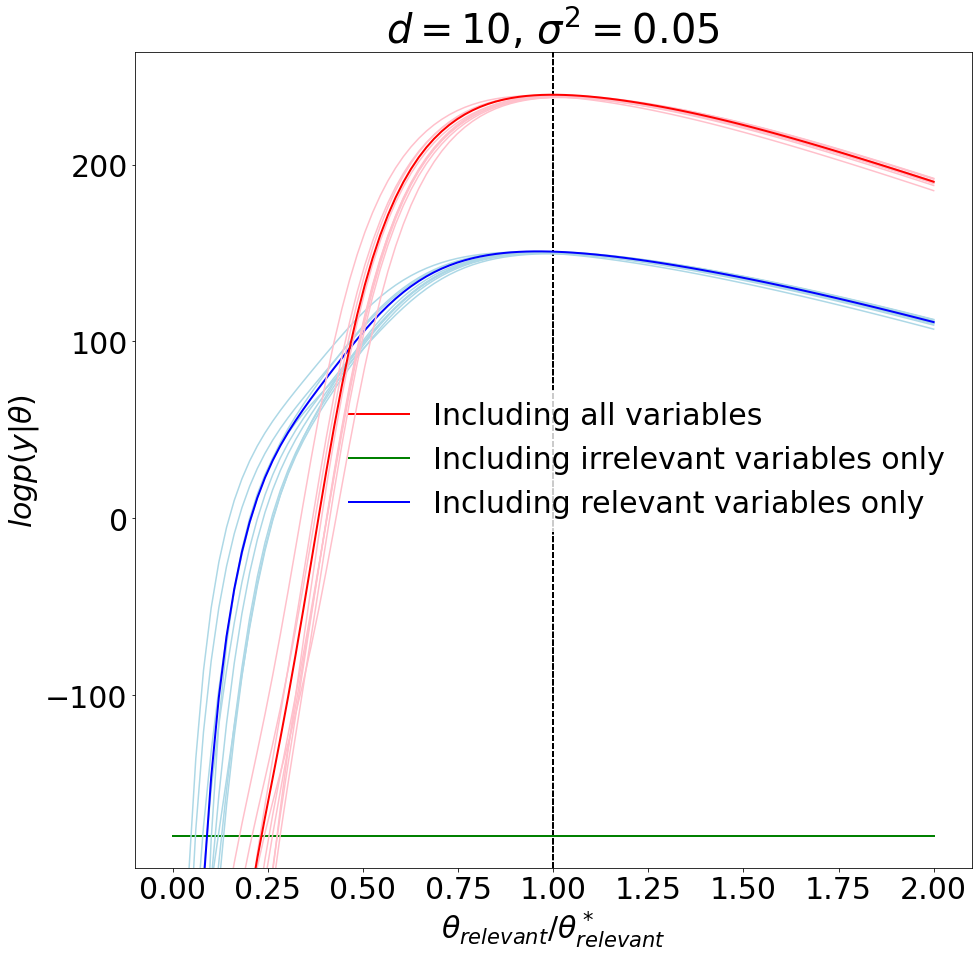

In [576]:
"""
Getting ML profiles for different ML-II solutions
"""
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

strue = np.var(f)
sigtrue = noise_var
theta = (np.linspace(0,2,100)*results_MLII_1d[0][0].reshape(q,1)).T

# Adding jitter for multiple runs
jitter = 1e-2
runs = 10
reg=0.01

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel(r'$\theta_{relevant} /\theta^*_{relevant}$')
axs.set_ylabel(r'$logp(y|\theta)$')

for j in range(runs):
    logl_true = np.zeros(100)
    if j < runs-1:
        jit = np.random.normal(0,jitter,p)
    else:
        jit = np.zeros(p)
    for i in range(len(theta)):
        l = np.concatenate((theta[i].reshape(q,)+jit[:q], jit[q:]))
        K = kernel_funcs.ARD_lm(l,results_MLII_1d[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(reg+results_MLII_1d[2])
        logl_true[i] = model_funcs.logL(Y,Ktild)
    
    logl_9d = np.zeros(100)    
    for i in range(len(theta)):
        l = np.concatenate((np.zeros(q), results_MLII_9d[0][0]))+jit
        K = kernel_funcs.ARD_lm(l,results_MLII_9d[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII_9d[2]**2+reg)
        logl_9d[i] = model_funcs.logL(Y,Ktild)    

    logl_est = np.zeros(100)
    for i in range(len(theta)):
        l = results_MLII[0][0]+jit
        l[:q] = theta[i]+jit[:q]
        K = kernel_funcs.ARD_lm(l,results_MLII[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII[2]**2+reg)
        logl_est[i] = model_funcs.logL(Y,Ktild)
        
    if j==(runs-1):
        plt.plot(np.linspace(0,2,100), logl_est, color ="red", label = "Including all variables", lw=2, zorder=11)
        plt.plot(np.linspace(0,2,100), logl_9d, color ="green", label = "Including irrelevant variables only", lw = 2)
        plt.plot(np.linspace(0,2,100), logl_true, color = "blue", label  ="Including relevant variables only", lw = 2, zorder=10)
    else:
        plt.plot(np.linspace(0,2,100), logl_est, color ="pink", zorder=11)
        plt.plot(np.linspace(0,2,100), logl_9d, color ="lightgreen")
        plt.plot(np.linspace(0,2,100), logl_true, color = "lightblue", zorder=10)
        plt.axvline(x=1, linestyle = "--", color = "black")
if noise_ratio>0.01:
    legend = plt.legend(fontsize = 30)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')
plt.ylim(bottom=np.min(logl_9d)-0.1*np.min(logl_9d)*np.sign(np.min(logl_9d)), top = np.max((logl_est,logl_true))+np.max((logl_est,logl_true))*0.1*np.sign(np.max((logl_est,logl_true))))
plt.title(r"$d={1}$, $\sigma^2 = {0}$".format(noise_ratio, p), Fontsize=40)
plt.show()
fig.savefig("ML_overfit_noise={0}_n={1}_d={2}".format(1*(noise_ratio>=0.1), n,p))  # CHANGE FOR NOISE AND N

### Evaluating ELBO under equivalent sets of solutions

C:\Users\hughw\Documents\MSC project\GP algorithms\Master function files\GP_funcs_ZTMFSS.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return kern(cdist(X,X, metric = "seuclidean", V = 1/l**2),s)


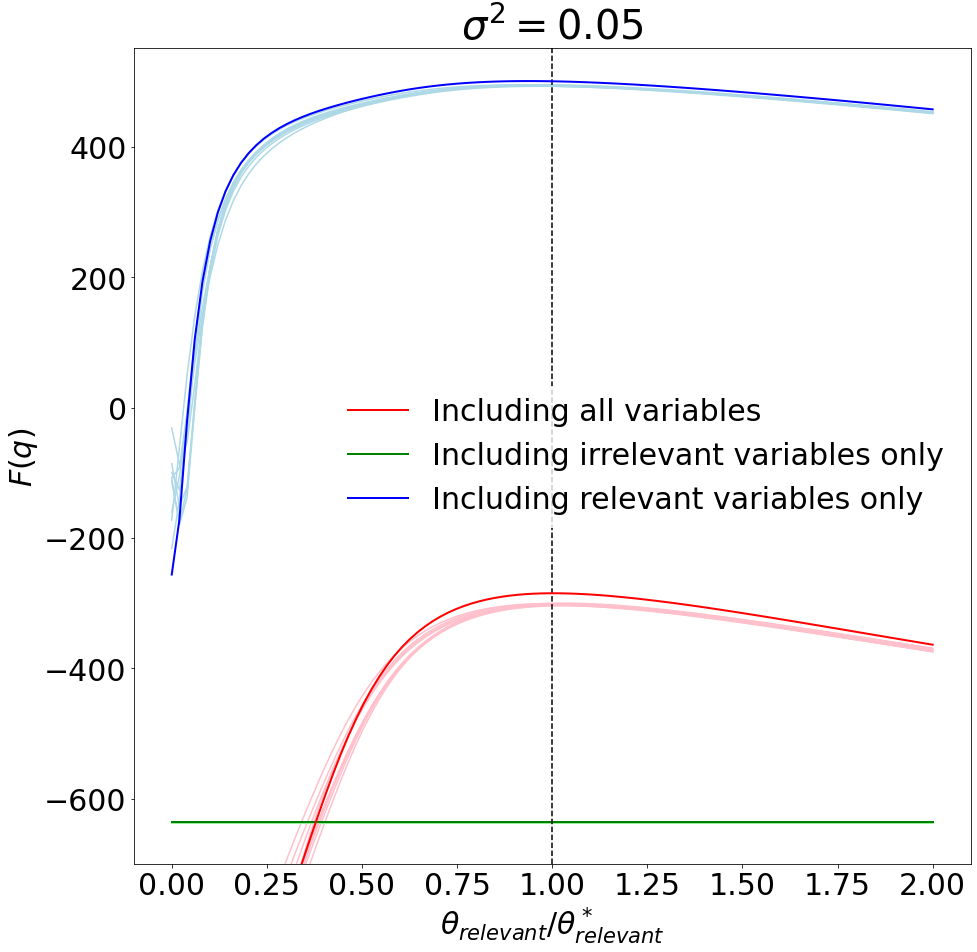

In [572]:
v_l0=1e+4
v_l1 = 1e-4

# Adding jitter for multiple runs
jitter = 1e-2
runs = 10
pi = 0.5
reg = 0.01

plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)

theta = (np.linspace(0,2,100)*results_MLII_1d[0][0].reshape(q,1)).T

plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig,axs = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
axs.set_facecolor('white')
axs.set_xlabel(r'$\theta_{relevant} /\theta^*_{relevant}$')
axs.set_ylabel(r'$F(q)$')

for j in range(runs):
    logl_true = np.zeros(100)
    if j < runs-1:
        jit = np.random.normal(0,jitter,p)
    else:
        jit = np.zeros(p)
        
    for i in range(len(theta)):
        l = np.concatenate((theta[i].reshape(q,)+jit[:q], jit[q:]))
        K = kernel_funcs.ARD_lm(l,results_MLII_1d[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII_1d[2]+reg)
        logl_true[i] = model_funcs.logL(Y,Ktild)
        logl_true[i] += -0.5*np.sum((v_l1)*(theta[i].reshape(q,)+jit[:q])**2)+0.5*(p-q)*np.log(v_l0)+0.5*1*np.log(v_l1)
        logl_true[i] += q*np.log(pi)+(p-q)*np.log(1-pi)
        
    logl_9d = np.zeros(100)
    for i in range(len(theta)):
        l = np.concatenate((np.zeros(q), results_MLII_9d[0][0]))+jit
        K = kernel_funcs.ARD_lm(l,results_MLII_9d[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII_9d[2]**2+reg)
        logl_9d[i] = model_funcs.logL(Y,Ktild)
        logl_9d[i] += -0.5*np.sum((v_l1)*l**2)+0.5*(p-q)*np.log(v_l1)+0.5*q*np.log(v_l0)
        logl_9d[i] += (p-q)*np.log(pi)+q*np.log(1-pi)


    logl_est = np.zeros(100)
    for i in range(len(theta)):
        l = results_MLII[0][0]+jit
        l[:q] = theta[i]+jit[:q]
        K = kernel_funcs.ARD_lm(l,results_MLII[1],X, kern=kernel_funcs.gaussian)
        Ktild = K+np.diag(np.ones(n))*(results_MLII[2]**2+reg)
        logl_est[i] = model_funcs.logL(Y,Ktild)
        logl_est[i] += -0.5*np.sum((v_l1)*l**2)+0.5*p*np.log(v_l1)
        logl_est[i] += p*np.log(pi)
        
    if j==(runs-1):
        plt.plot(np.linspace(0,2,100), logl_est, color ="red", label = "Including all variables", lw=2, zorder=11)
        plt.plot(np.linspace(0,2,100), logl_9d, color ="green", label = "Including irrelevant variables only", lw = 2)
        plt.plot(np.linspace(0,2,100), logl_true, color = "blue", label  ="Including relevant variables only", lw = 2, zorder=10)
        plt.axvline(x=1, linestyle = "--", color = "black")
    else:
        plt.plot(np.linspace(0,2,100), logl_est, color ="pink")
        plt.plot(np.linspace(0,2,100), logl_9d, color ="lightgreen")
        plt.plot(np.linspace(0,2,100), logl_true, color = "lightblue")
if noise_ratio>0.01:
    legend = plt.legend(fontsize = 30)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')
plt.ylim(bottom=np.min(logl_9d)-0.1*np.min(logl_9d)*np.sign(np.min(logl_9d)), top = np.max((logl_est,logl_true))+np.max((logl_est,logl_true))*0.1*np.sign(np.max((logl_est,logl_true))))
plt.title(r"$\sigma^2 = {0}$".format(noise_ratio), Fontsize=40)
plt.show()
fig.savefig("ElBO_fit_noise={0}_n=100".format(1*(noise_ratio>=0.1)))  # CHANGE FOR NOISE AND N, colo

## Running SSVGP on toy example

In [625]:
# Running sequence of values for algorithm
kern = kernel_funcs.gaussian
testing_algorithm = partial(diagnostics.get_pred_posterior_GP,reg = 0.01 ,kern = kern, latents = False)
hyper_vals = [1e+4*2**np.linspace(np.log2(100),-np.log2(100),20),1e-4*2**np.linspace(np.log2(100),-np.log2(100),20)]
hyper_arg = ["v0", "v1"]
best_loss, best_val, losses, Results = fit.hyper_opt_SSGP(
                                    Y, X, fit.VB_EM_GP_SS, testing_algorithm, hyper_arg, hyper_vals, method =  "ML", folds = 5, metric = "elbo", 
                                    training_args=["final_ELBO_sample", "ELBO_sample", "v0", "seed", "iter_remove", "print_VBEM", "learn_rate", "subsample", "sampling_strat", "min_VBEM_iter", "max_VBEM_iter", "GP_fit_tol", "VBEM_tol", "learn_rate_mult"], 
                                    training_arg_vals=[1,                   1000,         1e+4,  1,        True,          False,      0.025,    64,    "unif" ,  3,  10 , 1e-5,         0.1/p, 1])


run time is : 0.2702767848968506
run time is : 0.2622983455657959
run time is : 0.26329636573791504
run time is : 0.2682819366455078
run time is : 0.25829410552978516
run time is : 0.25926947593688965
run time is : 0.2563133239746094
run time is : 0.2682826519012451
run time is : 0.2573118209838867
run time is : 0.264293909072876
run time is : 0.25830793380737305
run time is : 0.26130127906799316
run time is : 0.2573120594024658
run time is : 0.26329541206359863
run time is : 0.3479959964752197
run time is : 0.3809802532196045
run time is : 0.29720425605773926
run time is : 0.29421210289001465
run time is : 0.2872314453125
run time is : 0.22140717506408691


In [626]:
# trying out new nn function
log_predictives = np.zeros(len(Results))
KL = np.zeros(len(Results))
t = time.time()
for i in range(len(Results)):
    log_predictives[i] =  diagnostics.get_pred_posterior_GP_NN_CV(Y,X,Results[i],0.01,kernel_funcs.gaussian,NN=64, fraction=1,post_var=True, print_=True, use_tree=False, leaf_size=100, seed=0)
    KL[i] = diagnostics.get_KL(Results[i],10**4,10**-4,10**-3,10**-3)
    print(i)
print(time.time()-t)
print(log_predictives)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2.462517023086548
[-287.2734088  -287.27404144 -287.27381839 -287.27382767 -287.27383338
 -287.2738369  -287.27383907 -287.2738404  -287.27384123 -287.27384173
 -287.27384204 -287.27384224 -287.27384235 -287.2738216  -292.81399737
 -347.40190976 -348.31173171 -402.08834762 -402.06126399 -402.10099331]


[7.14379022e-02 7.13927217e-02 7.14086473e-02 7.14079850e-02
 7.14075770e-02 7.14073257e-02 7.14071710e-02 7.14070757e-02
 7.14070170e-02 7.14069809e-02 7.14069586e-02 7.14069449e-02
 7.14069365e-02 7.14084186e-02 2.80337793e-04 5.50113773e-28
 2.21473549e-28 9.78215010e-52 1.00507065e-51 9.65922687e-52]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]


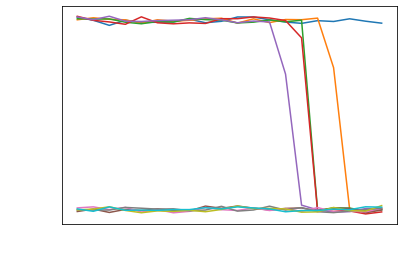

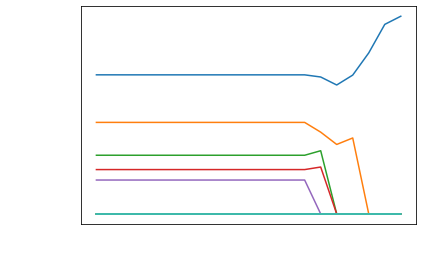

<BarContainer object of 10 artists>

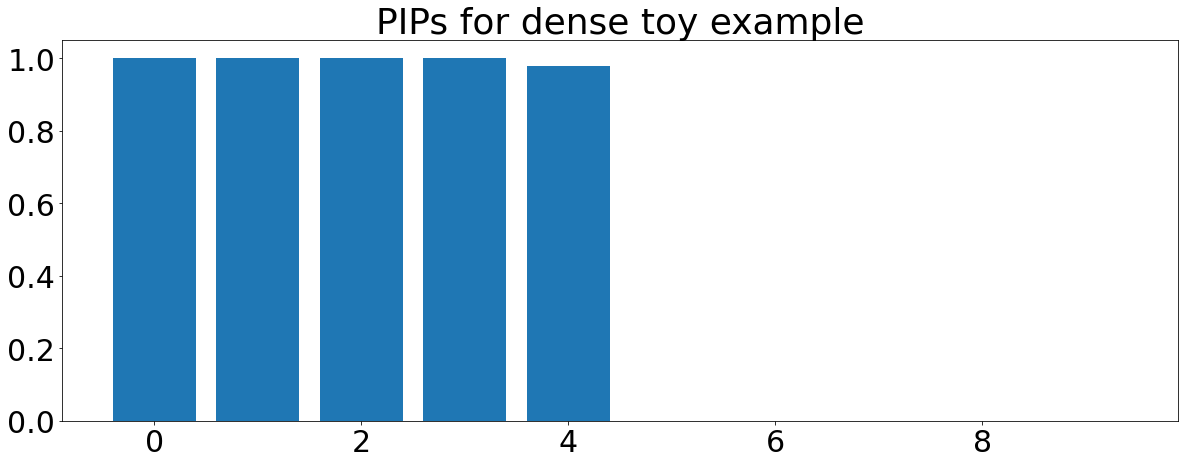

In [627]:
# Doing CV_hyperopt to get model weights with ELPD
mse = True
elbos = np.zeros(len(Results))
for j in range(len(Results)):
    if mse:
        elbos[j]=log_predictives[j]#+KL[j]
    else:
        elbos[j] = Results[j][len(Results[j])-1]
max_elbo = np.max(elbos)

weights = np.zeros(len(Results))
# Getting weighted PIPS and L
Lmbda = np.zeros((len(Results), p))
Ls = np.zeros((len(Results), p))
for j in range(len(Results)):
    Lmbda[j] = Results[j][3]
    Ls[j] = np.abs(Results[j][0][0])
    elbo = elbos[j]
    if elbo < max_elbo-500:
        weights[j]==0
    else:
        weights[j] = np.exp(elbos[j]-max_elbo)
weights = weights/weights.sum()
print(weights)
where = np.where(Lmbda>0.01)
for i in range(10):
    print(where[1][np.where(where[0]==i)])
PIP = Lmbda.T @ weights
l = Ls.T @ weights
plt.plot(Lmbda+np.random.normal(0,0.01,n_keep*p).reshape(n_keep,p));
plt.show()
plt.plot(Ls)
plt.show()
plt.rcParams.update({'text.color' : "black",
                      'xtick.color' : "black",
                      'ytick.color' : "black",
                     'axes.labelcolor' : "black"})
fig = plt.figure(figsize = (20,7))
fig.set_facecolor('white')
plt.title("PIPs for dense toy example")
plt.bar(range(p), PIP)

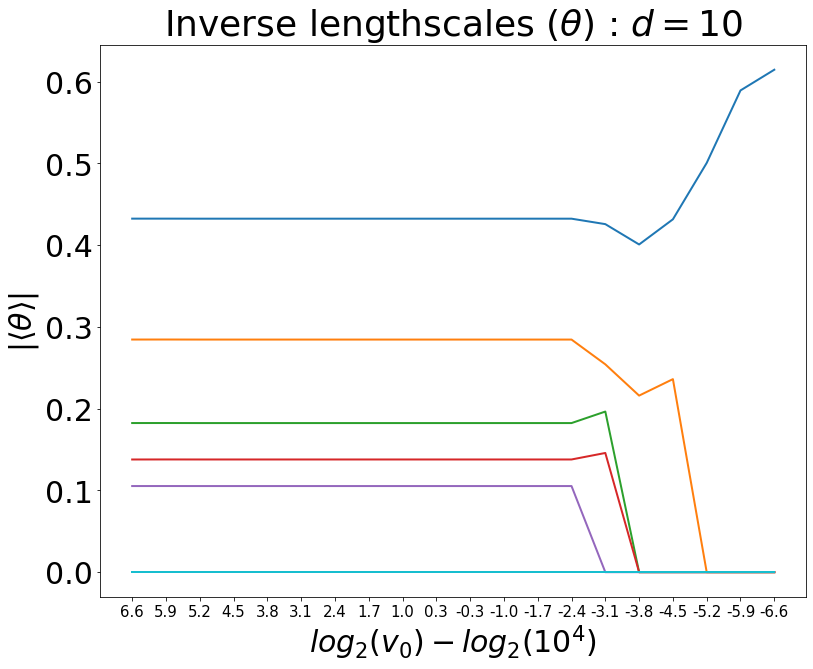

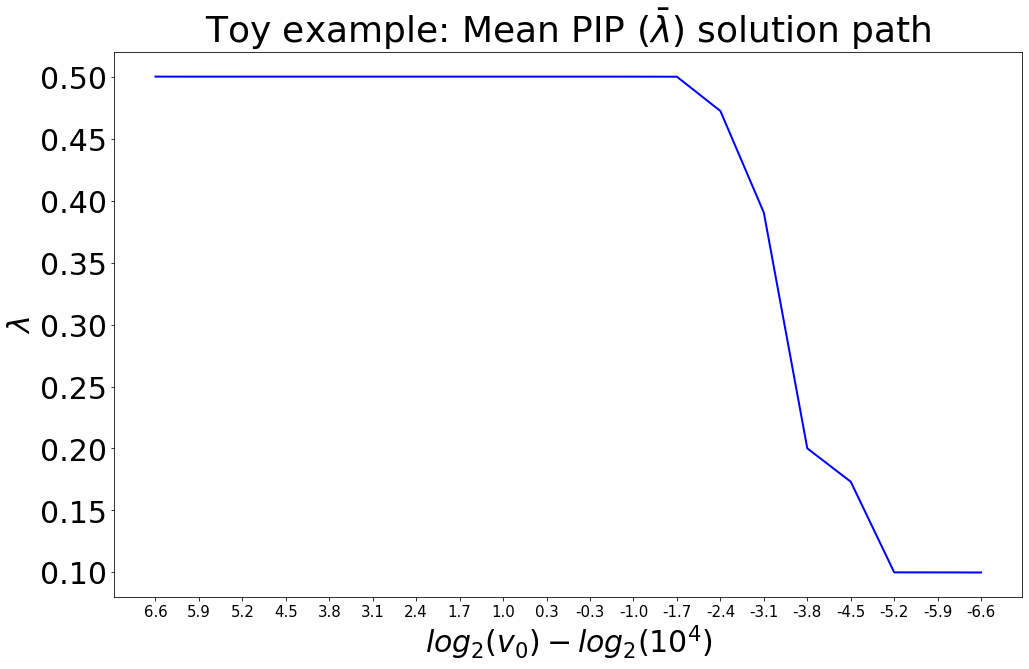

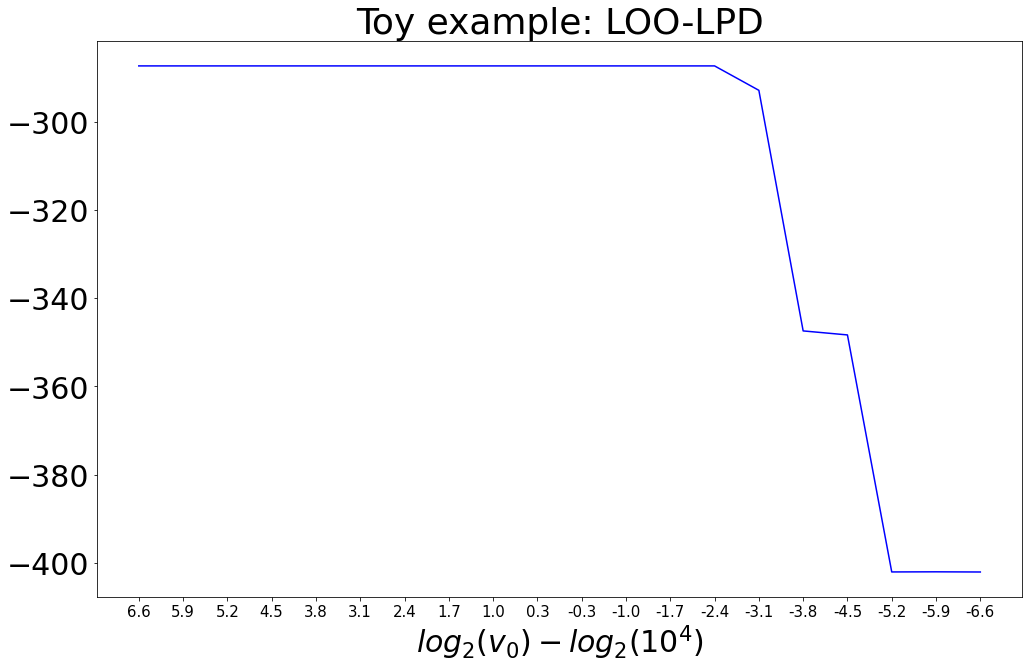

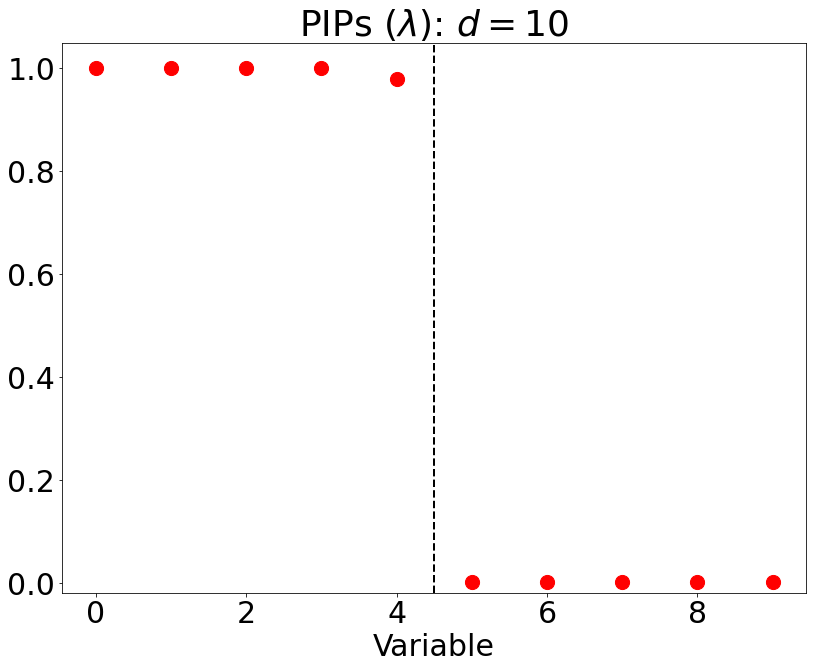

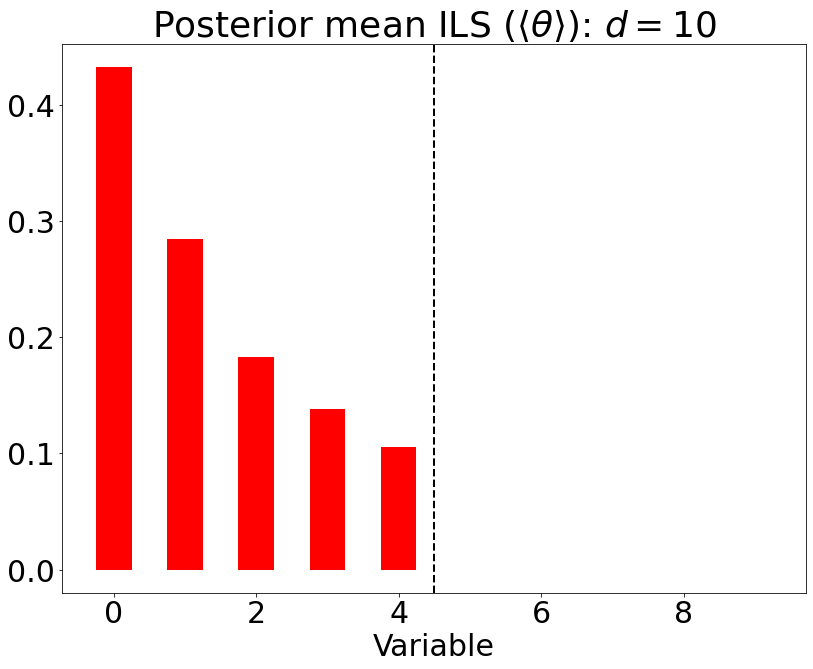

In [628]:
""" Use these plots for varying coefficients """
plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize=(12,10))
plt.ylabel(r"$|\langle \theta \rangle| $")
plt.xlabel(r"$log_2(v_0)-log_2(10^4)$")
plt.title(r"Inverse lengthscales ($\theta$) : $d={0}$".format(p))
plt.xticks(np.linspace(0,19,20),np.round(np.linspace(np.log2(100),-np.log2(100),20),1), fontsize = 15)
plt.plot(Ls, lw=2)
plt.tight_layout()
plt.show()
fig.savefig("variable_inclusion_plot_toyexample_d={0}".format(p), bbox_inches = "tight")

plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize=(15,10))
plt.xlabel(r"$log_2(v_0)-log_2(10^4)$")
plt.xticks(np.linspace(0,19,20),np.round(np.linspace(np.log2(100),-np.log2(100),20),1), fontsize = 15)
plt.title(r"Toy example: Mean PIP $(\bar \lambda)$ solution path")
plt.ylabel(r"$\lambda$")
plt.plot(np.mean(Lmbda,1), "blue", lw=2)
plt.tight_layout()
fig.savefig("total_PIP_toyexample_d={0}".format(p), bbox_inches = "tight")

plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize=(15,10))
plt.xlabel(r"$log_2(v_0)-log_2(10^4)$")
plt.xticks(np.linspace(0,19,20),np.round(np.linspace(np.log2(100),-np.log2(100),20),1), fontsize = 15)
plt.title(r"Toy example: LOO-LPD")
plt.plot(log_predictives, color = "blue")
plt.tight_layout()
fig.savefig("log_predictives_toyexample_d={0}".format(p), bbox_inches = "tight")

plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize=(12,10))
plt.xlabel("Variable")
plt.title(r"PIPs ($\lambda$): $d={0}$".format(p))
plt.scatter(range(p),np.sort(PIP)[::-1], color = "red", s=200, marker = "o")
#plt.bar(range(p),np.sort(PIP)[::-1], color = "crimson", width = 0.5)
plt.ylim(-0.02,1.05)
plt.axvline(x=q-0.5, linestyle = "--", color = "black", label = "LHS: true inclusions / RHS : true exclusions", lw = 2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
#plt.legend(fontsize = 18)
plt.tight_layout()
fig.savefig("Marginal_PIPs_toyexample_d={0}".format(p), bbox_inches = "tight")

plt.rc('axes',edgecolor='black')
font = {'size'   : 30}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize=(12,10))
plt.xlabel("Variable")
plt.title(r"Posterior mean ILS ($\langle \theta \rangle$): $d={0}$".format(p))
plt.bar(range(p),np.sort(l)[::-1], color = "red", width = 0.5+0.3*(p>10))
#plt.scatter(range(p),np.sort(l)[::-1], color = "red", s=500, marker = "X")
plt.axvline(x=q-0.5, linestyle = "--", color = "black", label = "LHS: true inclusions / RHS : true exclusions", lw = 2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
#plt.legend(fontsize = 18)
plt.ylim(-0.02,np.max(np.abs(l))+0.02)
plt.tight_layout()
fig.savefig("Marginal_ILS_toyexample_d={0}".format(p), bbox_inches = "tight")

## PPI testing

In [630]:
def intersection(c,v0, Elogpi=1,Elog1_pi=1):
    return np.sqrt((np.log(1/c)+2*(Elog1_pi-Elogpi))/(v0*(1-c)))


In [192]:
n_c = 100
n_v0 = 10
n_pi = 100
c_vals = np.tile(10**np.linspace(-2,-11,n_c),n_v0).reshape(n_v0,n_c)
pi_vals = np.linspace(0.01,0.99,n_pi)
v0_vals = np.repeat(10**np.linspace(2,11,n_v0),n_c).reshape(n_v0,n_c)

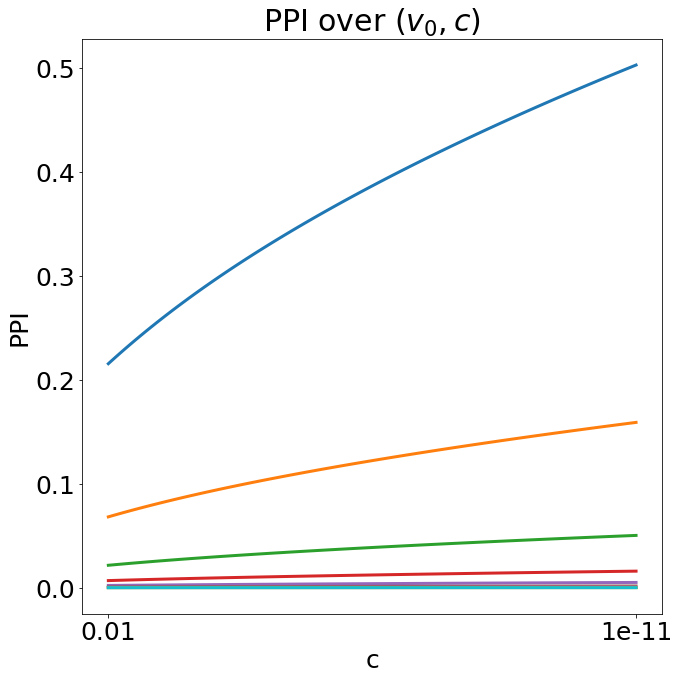

In [211]:
plt.rc('axes',edgecolor='black')
font = {'family' : 'normal',
        'size'   : 25}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize = (10,10))
fig.set_facecolor('white')
axs.set_facecolor('white')
for i in range(n_v0):
    plt.plot(intersection(c_vals[i],v0_vals[i]), label = r"$v_0 = 1e+{0}$".format(i+2), linewidth = 3)
    plt.xlabel("c")
    plt.xticks([0,99],[c_vals[0][0],c_vals[0][99]])
    plt.ylabel("PPI")
plt.title(r"PPI over ($v_0,c$)")
plt.tight_layout()
fig.savefig("spike_precision_plot_vo_c")

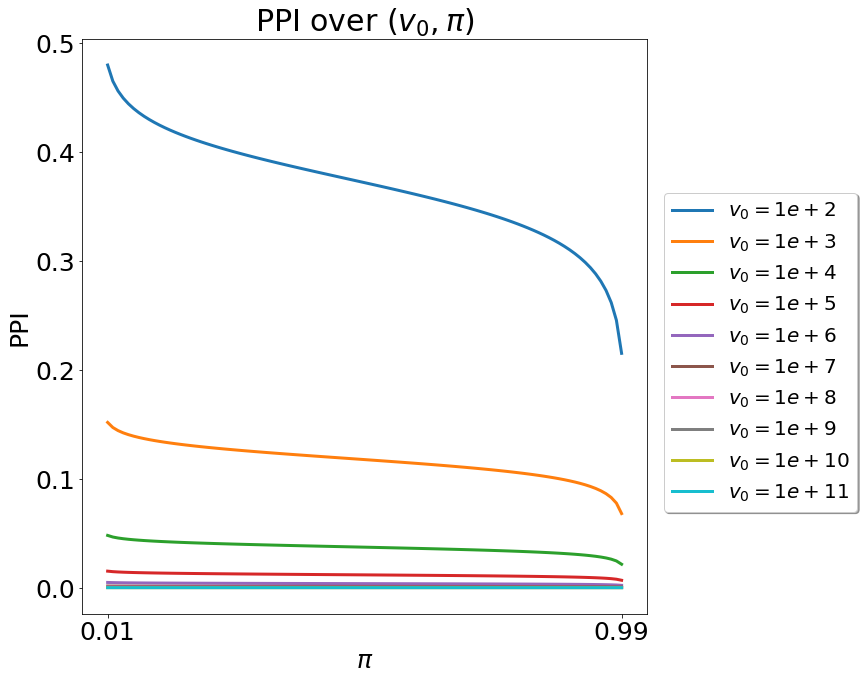

In [210]:
plt.rc('axes',edgecolor='black')
font = {'family' : 'normal',
        'size'   : 25}
plt.rc('font', **font)
fig,axs = plt.subplots(figsize = (13,10))
fig.set_facecolor('white')
axs.set_facecolor('white')
for i in range(n_v0):
    Elogpi = np.log(pi_vals)
    Elog1_pi = np.log(1-pi_vals)
    plt.plot(intersection(1e-6,v0_vals[i], Elogpi,Elog1_pi), label = r"$v_0 = 1e+{0}$".format(i+2), linewidth = 3)
    plt.xlabel(r"$\pi$")
    plt.xticks([0,99],[0.01,0.99])
    plt.ylabel("PPI")
plt.legend(fontsize = 20,loc='upper center', bbox_to_anchor=(1.2, 0.75),
          fancybox=True, shadow=True, ncol=1)
plt.title(r"PPI over ($v_0,\pi$)")
plt.tight_layout()
fig.savefig("spike_precision_plot_vo_pi")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


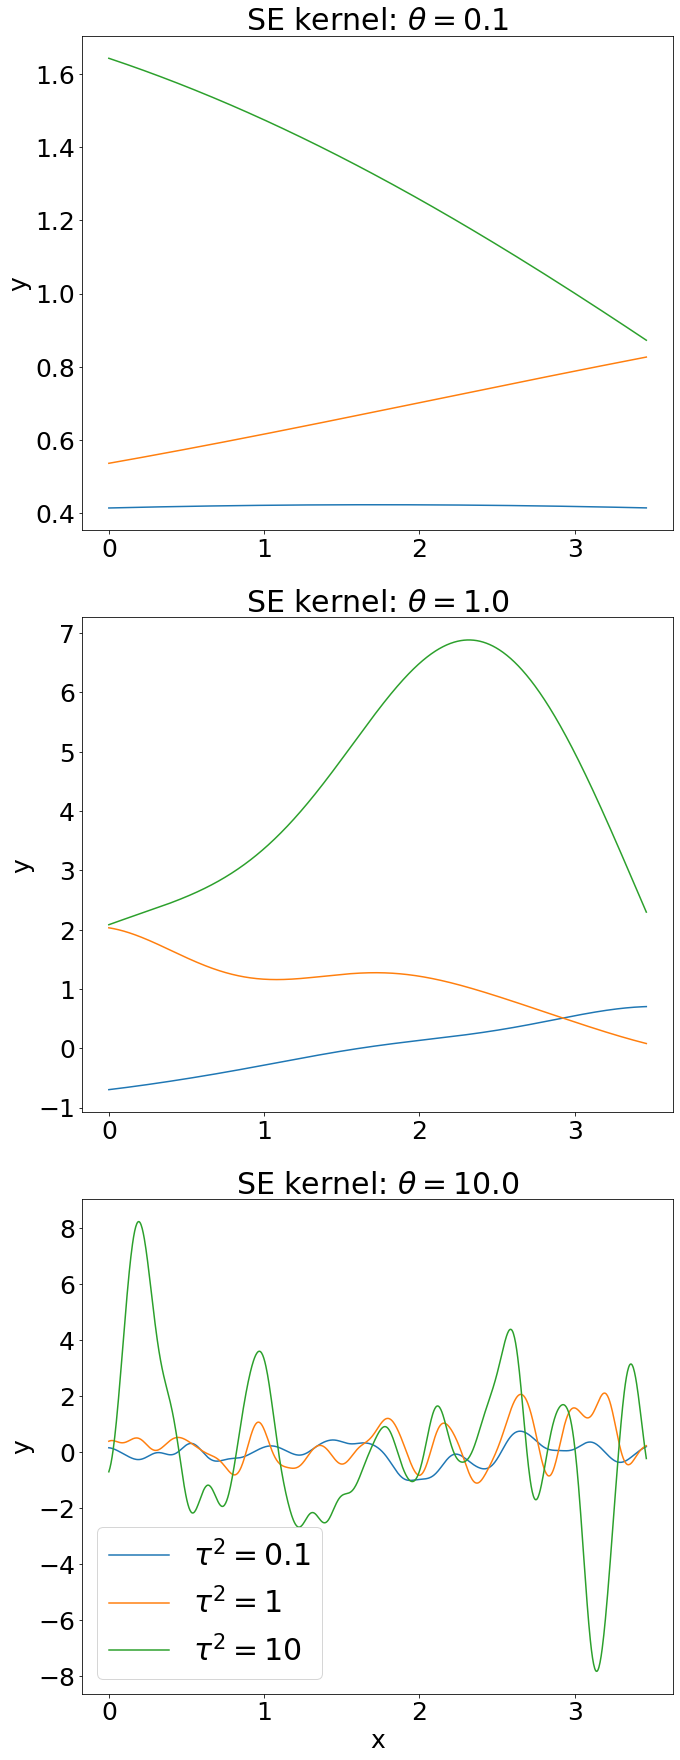

No handles with labels found to put in legend.
No handles with labels found to put in legend.


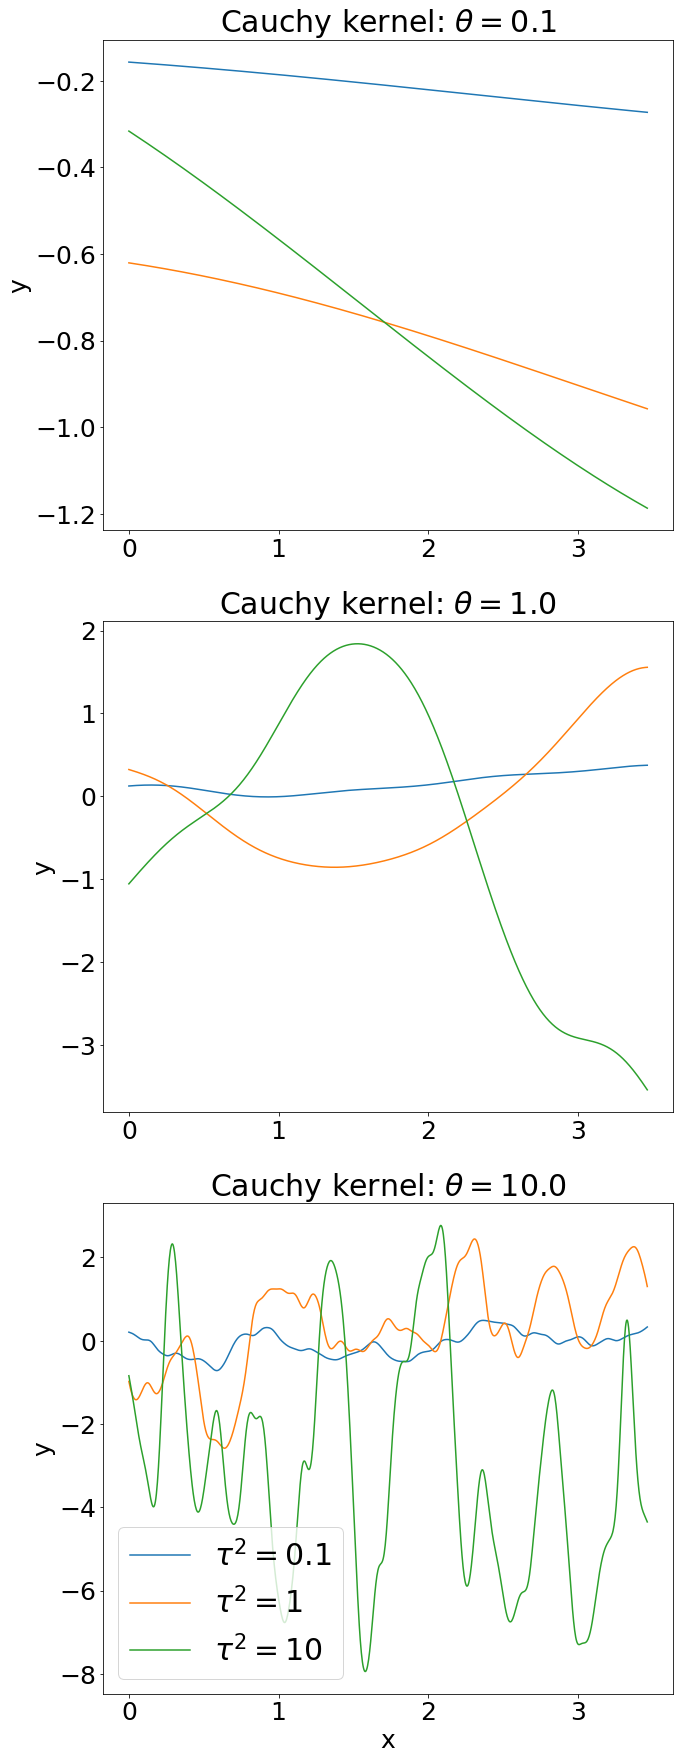

No handles with labels found to put in legend.
No handles with labels found to put in legend.


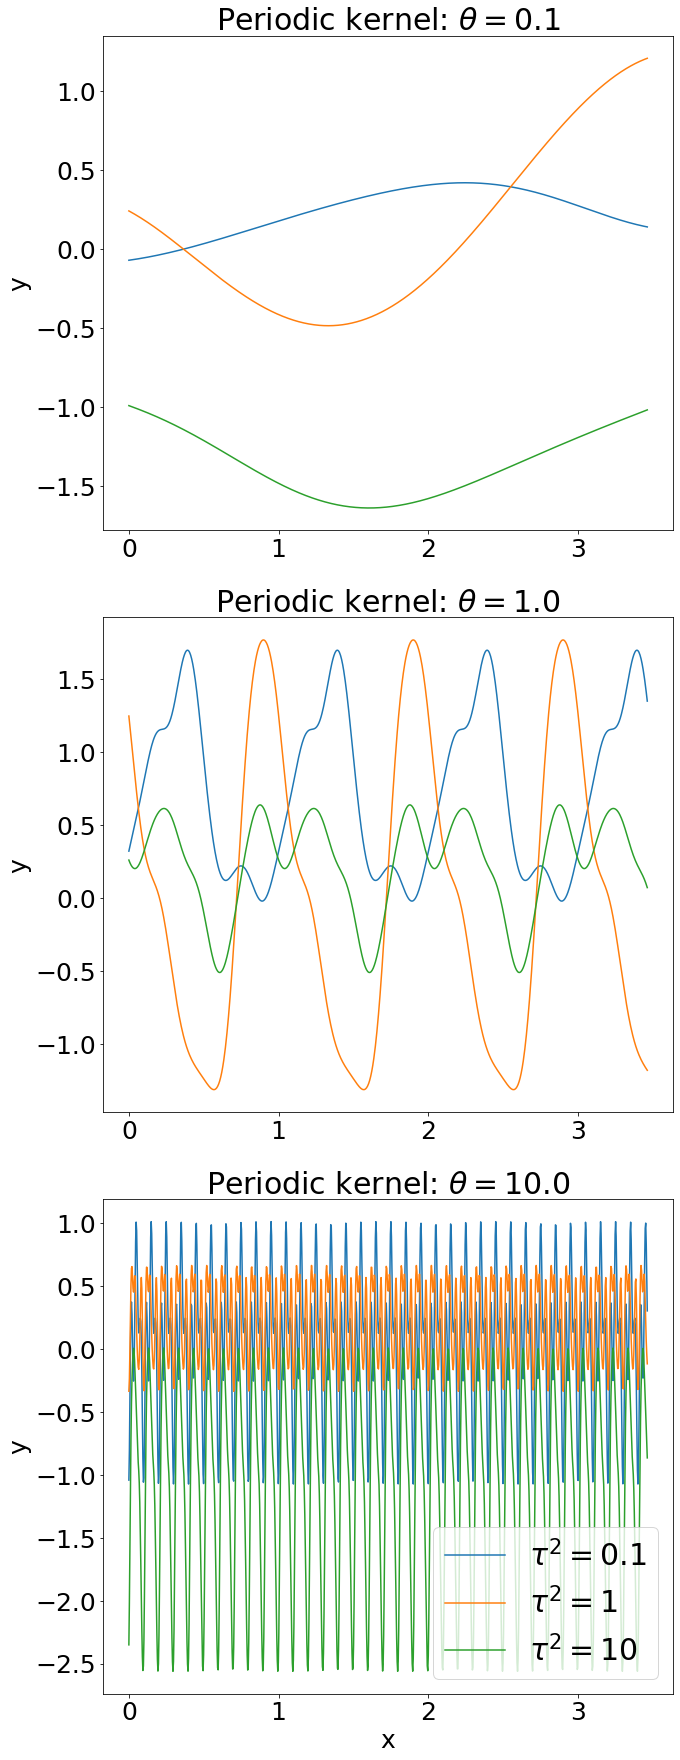

No handles with labels found to put in legend.
No handles with labels found to put in legend.


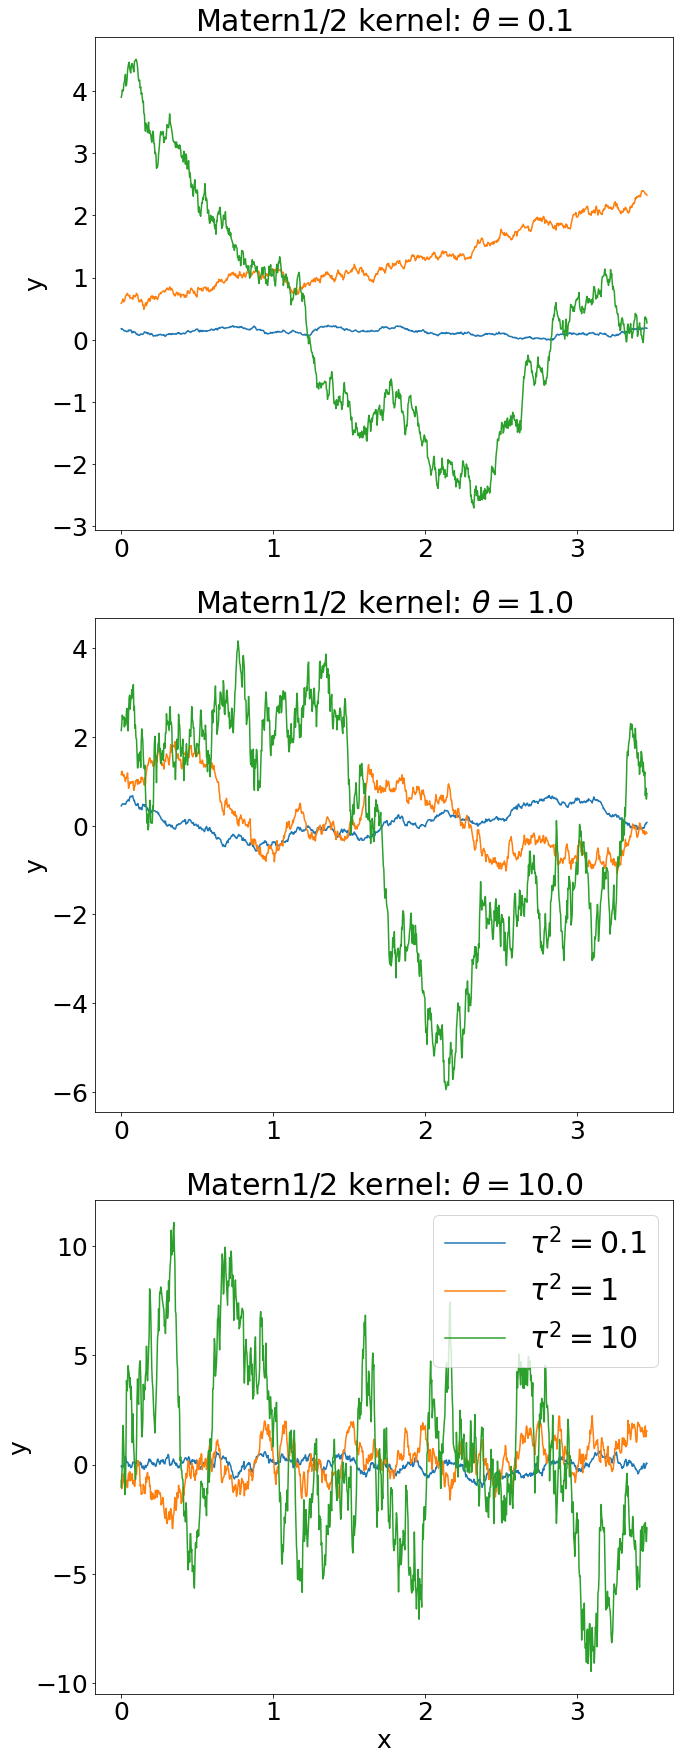

In [9]:
plt.rc('axes',edgecolor='black')
font = {'family' : 'normal',
        'size'   : 25}
plt.rc('font', **font)
n = 1000
ntest = 0
p = 1
q=1
corr=0
sigma2=1
s=[0.1,1,10]
l=np.array([[1/10],[1],[10]])
r2=1

x = np.linspace(0,1,1000)
x = x/np.var(x)**0.5

"""
SE-kernel
"""
kern = kernel_funcs.gaussian
fig,axs = plt.subplots(3,figsize = (10,25))
for i in range(3):
    axs[i].set_title(r'SE kernel: $\theta = {0}$'.format(l[i][0]))
    for j in range(3):
        K = kernel_funcs.ARD_lm(l[i],s[j],x.reshape(n,1),kern)
        y = np.random.multivariate_normal(np.zeros(n),K,1)
        axs[i].plot(x,y.T, label = r'$\tau^2 = {0}$'.format(s[j]))
    if i==2:
        axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    plt.legend(fontsize=30)
plt.tight_layout()
plt.show()
fig.savefig("SE_kernel")

"""
Cauchy kernel
"""
kern = kernel_funcs.cauchy 
fig,axs = plt.subplots(3,figsize = (10,25))
for i in range(3):
    axs[i].set_title(r'Cauchy kernel: $\theta = {0}$'.format(l[i][0]))
    for j in range(3):
        K = kernel_funcs.ARD_lm(l[i],s[j],x.reshape(n,1),kern)
        y = np.random.multivariate_normal(np.zeros(n),K,1)
        axs[i].plot(x,y.T, label = r'$\tau^2 = {0}$'.format(s[j]))
    if i==2:
        axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    plt.legend(fontsize=30)
plt.tight_layout()
plt.show()
fig.savefig("Cauchy_kernel")

"""
Periodic kernel
"""
kern = kernel_funcs.periodic 
fig,axs = plt.subplots(3,figsize = (10,25))
for i in range(3):
    axs[i].set_title(r'Periodic kernel: $\theta = {0}$'.format(l[i][0]))
    for j in range(3):
        K = kernel_funcs.ARD_lm(l[i],s[j],x.reshape(n,1),kern)
        y = np.random.multivariate_normal(np.zeros(n),K,1)
        axs[i].plot(x,y.T, label = r'$\tau^2 = {0}$'.format(s[j]))
    if i==2:
        axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    plt.legend(fontsize=30)
plt.tight_layout()
plt.show()
fig.savefig("Periodic_kernel")

"""
Matern kernel
"""
kern = kernel_funcs.matern0 
fig,axs = plt.subplots(3,figsize = (10,25))
for i in range(3):
    axs[i].set_title(r'Matern1/2 kernel: $\theta = {0}$'.format(l[i][0]))
    for j in range(3):
        K = kernel_funcs.ARD_lm(l[i],s[j],x.reshape(n,1),kern)
        y = np.random.multivariate_normal(np.zeros(n),K,1)
        axs[i].plot(x,y.T, label = r'$\tau^2 = {0}$'.format(s[j]))
    if i==2:
        axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    plt.legend(fontsize=30)
plt.tight_layout()
plt.show()
fig.savefig("Matern_kernel")

In [9]:
1/(10)*np.sin(10)

-0.05440211108893698